# Bitcoin History Data

import Libary
Read csv
Take a first look

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("Bitcoin_dataset_updated.csv")

In [7]:
df.head()

,Date,BTC price [USD],n-transactions,fee [USD],btc search trends,Gold price[USD],SP500 close index,Oil WTI price[USD],M2(Not seasonally adjusted)[1e+09 USD]
0,2014-01-02,749.27,54770.0,0.18,8,1225.0,1831.98,95.14,11089.3
1,2014-01-03,781.23,60980.0,NaN,8,1238.4,1831.37,93.66,11089.3
2,2014-01-04,807.39,52052.0,NaN,8,NaN,NaN,NaN,11089.3
3,2014-01-05,828.74,58662.0,0.38,8,NaN,NaN,NaN,11089.3
4,2014-01-06,904.98,67358.0,NaN,8,1237.8,1826.77,93.12,11089.3


Make some plots with the data for a further look

In [27]:
date = df["Date"]
bitPrice = df["BTC price [USD]"]
goldPrice = df["Gold price[USD]"]
oilPrice = df["Oil WTI price[USD]"]
sp500 = df["SP500 close index"]
transac = df["n-transactions"]

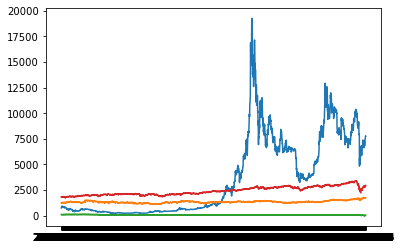

In [26]:
plt.plot(date, bitPrice)
plt.plot(date, goldPrice)
plt.plot(date, oilPrice)
plt.plot(date, sp500)

plt.show()

In [22]:
print(df)

            Date  BTC price [USD]  n-transactions  fee [USD]  \
0     2014-01-02           749.27         54770.0       0.18   
1     2014-01-03           781.23         60980.0        NaN   
2     2014-01-04           807.39         52052.0        NaN   
3     2014-01-05           828.74         58662.0       0.38   
4     2014-01-06           904.98         67358.0        NaN   
...          ...              ...             ...        ...   
2305  2020-04-25          7507.08        280805.0       0.75   
2306  2020-04-26          7549.52        252833.0       0.62   
2307  2020-04-27          7699.27        311217.0       0.69   
2308  2020-04-28          7790.66        323475.0       0.66   
2309  2020-04-29          7765.33        331401.0       1.30   

      btc search trends  Gold price[USD]  SP500 close index  \
0                     8           1225.0            1831.98   
1                     8           1238.4            1831.37   
2                     8              NaN  

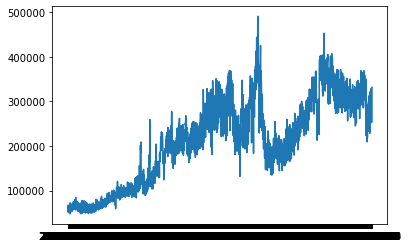

In [30]:
plt.plot(date, transac)
plt.show()

assume that the data at 2017 may be interesting for us. So we filterthem and make plots again

In [62]:
df.head()
df.dtypes

Date                                      datetime64[ns]
BTC price [USD]                                  float64
n-transactions                                   float64
fee [USD]                                        float64
btc search trends                                  int64
Gold price[USD]                                  float64
SP500 close index                                float64
Oil WTI price[USD]                               float64
M2(Not seasonally adjusted)[1e+09 USD]           float64
dtype: object

In [58]:
df["Date"] = pd.to_datetime(df["Date"])

dateAt2017 = df.loc[df["Date"].dt.year >= 2017, "Date"]
bitPriceAt17 = df.loc[df["Date"].dt.year >= 2017, "BTC price [USD]"]
goldPriceAt17 = df.loc[df["Date"].dt.year >= 2017, "Gold price[USD]"]
oilPriceAt17 = df.loc[df["Date"].dt.year >= 2017, "Oil WTI price[USD]"]
sp500PriceAt17 = df.loc[df["Date"].dt.year >= 2017, "SP500 close index"]

print(dateAt2017)
print(goldPriceAt17)

1095   2017-01-01
1096   2017-01-02
1097   2017-01-03
1098   2017-01-04
1099   2017-01-05
          ...    
2305   2020-04-25
2306   2020-04-26
2307   2020-04-27
2308   2020-04-28
2309   2020-04-29
Name: Date, Length: 1215, dtype: datetime64[ns]
1095        NaN
1096    1151.05
1097    1232.90
1098    1235.30
1099    1250.30
         ...   
2305        NaN
2306        NaN
2307    1723.80
2308    1722.20
2309    1713.40
Name: Gold price[USD], Length: 1215, dtype: float64


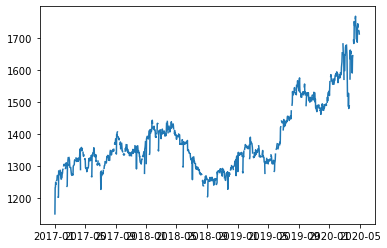

In [59]:
plt.plot(dateAt2017, goldPriceAt17)
# plt.plot(dateAt2017, bitPriceAt17)
# plt.plot(dateAt2017, oilPriceAt17)
# plt.plot(dateAt2017, sp500PriceAt17)
plt.show()

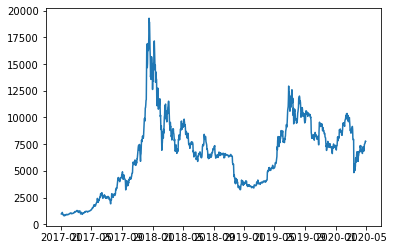

In [63]:
plt.plot(dateAt2017, bitPriceAt17)
plt.show()

In [4]:
df.head()

NameError: name 'df' is not defined